# CIFAR-10

### Import libraries

In [4]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import initializers, regularizers

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Sanity check



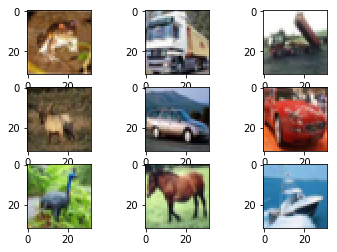

In [100]:
for i in range(3):
    for j in range(3):
        idx = i*3 + j + 1
        plt.subplot(3,3,idx)
        plt.imshow(X_train[idx-1])

### Basic Data Statistics

In [101]:
num_of_classes = np.unique(y_train).shape[0]
print("Number of training examples: ", X_train.shape[0])
print("Number of testing examples: ", X_test.shape[0])
print("Shape of input images: ", X_train.shape[1:])
print("Data type: ", X_train.dtype)
print("Number of classes: ", num_of_classes)

Number of training examples:  50000
Number of testing examples:  10000
Shape of input images:  (32, 32, 3)
Data type:  uint8
Number of classes:  10


### Pixel wise standardization

In [102]:
pixel_mean = X_train.mean(axis=0)
pixel_std = X_train.std(axis=0) + 1e-10 #prevents division by zero-error
# piwel-wise normalization on the train and test set
X_train = (X_train - pixel_mean) / pixel_std
X_test = (X_test - pixel_mean) / pixel_std


### To_categorical



In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Change data shape

In [7]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

### Split data

In [8]:
seed = 7
np.random.seed(seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

print("Training set shape: ", X_train.shape)
print("Validation set shape: ", X_val.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (40000, 32, 32, 3)
Validation set shape:  (10000, 32, 32, 3)
Testing set shape:  (10000, 32, 32, 3)


#### Perform some data augmentation
Gjør mer av dette etterpå kanskje

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


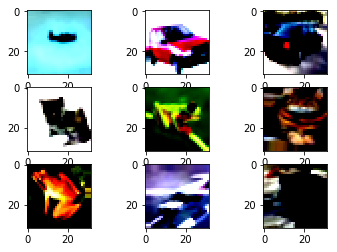

In [106]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            rotation_range=15,
                            fill_mode="nearest")

datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32, 32,3))
    plt.show()
    break

## Build Model

In [12]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3),input_shape=(32,32,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(32, (3,3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (3,3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(128, (3,3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

#### Compile model

In [13]:
adam = keras.optimizers.Adam(lr=0.0006, epsilon=1e-4)

model.compile(optimizer=adam,
             loss="categorical_crossentropy",
             metrics=['accuracy'],
             )

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

#### Train the model on images with slight augmentation

In [109]:

model.fit_generator(datagen.flow(X_train, y_train, batch_size=64),
                   steps_per_epoch=len(X_train)/64,
                   epochs=25,
                   validation_data=(X_val, y_val),
                   verbose=1)


Epoch 1/25
625/625 [==============================] - 118s 189ms/step - loss: 1.8259 - acc: 0.3967 - val_loss: 1.3889 - val_acc: 0.5329
Epoch 2/25
625/625 [==============================] - 112s 179ms/step - loss: 1.3712 - acc: 0.5240 - val_loss: 1.3595 - val_acc: 0.5534
Epoch 3/25
625/625 [==============================] - 112s 180ms/step - loss: 1.1943 - acc: 0.5883 - val_loss: 1.0402 - val_acc: 0.6514
Epoch 4/25
625/625 [==============================] - 110s 176ms/step - loss: 1.0912 - acc: 0.6294 - val_loss: 1.0227 - val_acc: 0.6712
Epoch 5/25
625/625 [==============================] - 110s 176ms/step - loss: 1.0231 - acc: 0.6551 - val_loss: 0.9667 - val_acc: 0.6903
Epoch 6/25
625/625 [==============================] - 110s 176ms/step - loss: 0.9894 - acc: 0.6686 - val_loss: 0.9056 - val_acc: 0.7116
Epoch 7/25
625/625 [==============================] - 110s 176ms/step - loss: 0.9408 - acc: 0.6853 - val_loss: 1.0191 - val_acc: 0.6788
Epoch 8/25
625/625 [============================

### Visualize and analyse

fit_generator tracks both loss and accuracy on training and validation set

#### Loss

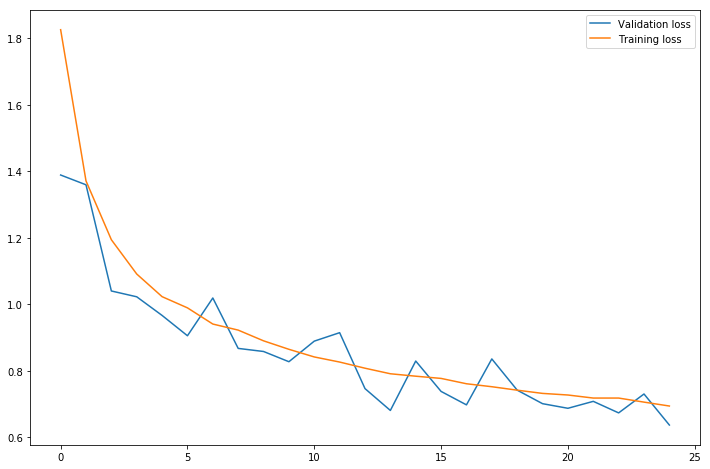

In [110]:
history = model.history.history
plt.figure(figsize=(12, 8))
plt.plot(history["val_loss"], label="Validation loss")
plt.plot(history["loss"], label="Training loss")
plt.legend()

#### Accuracy

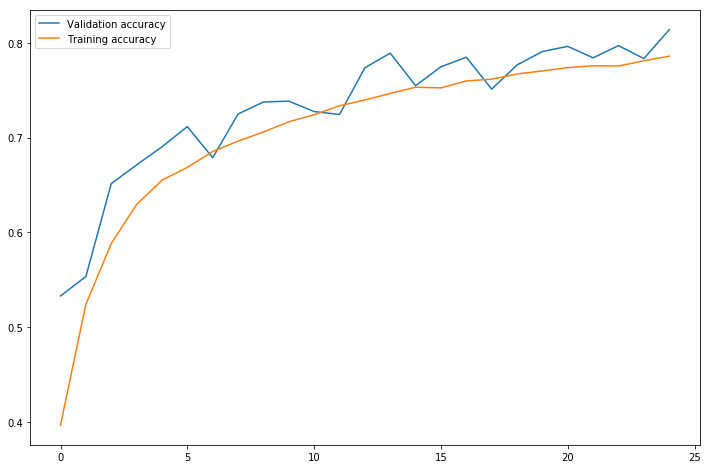

In [111]:
plt.figure(figsize=(12, 8))
plt.plot(history["val_acc"], label="Validation accuracy")
plt.plot(history["acc"], label="Training accuracy")

plt.legend()

### Evaluation on test set

In [112]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss: ", test_loss)
print("Test acc: ", test_acc)

10000/10000 [==============================] - 7s 737us/step
Test loss:  0.6337312896728515
Test acc:  0.8161


#### Compare to previous plot

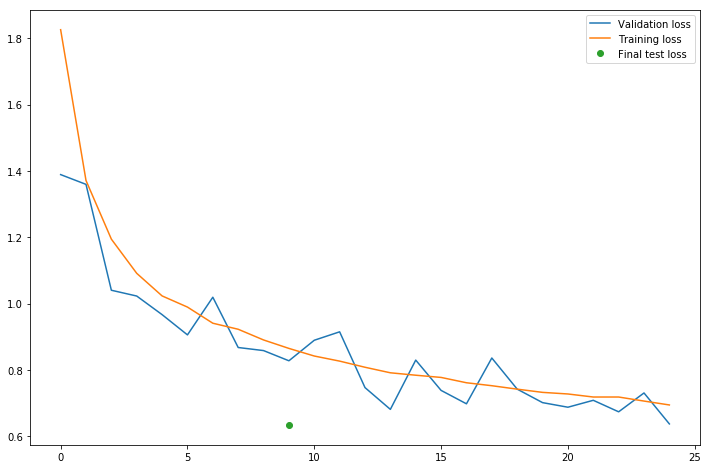

In [113]:
history = model.history.history
plt.figure(figsize=(12, 8))
plt.plot(history["val_loss"], label="Validation loss")
plt.plot(history["loss"], label="Training loss")
plt.plot([9], [test_loss], 'o', label="Final test loss")
plt.legend()


In [114]:

model.save("high_model.h5")
del model

In [19]:
from sklearn.metrics import classification_report

predicted = model.predict(X_test)
target_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
report = classification_report(y_test.argmax(axis=1), predicted.argmax(axis=1), target_names=target_names)
print(report)

             precision    recall  f1-score   support

   airplane       0.31      0.00      0.01      1000
 automobile       0.12      0.98      0.22      1000
       bird       0.32      0.02      0.04      1000
        cat       0.24      0.01      0.02      1000
       deer       0.00      0.00      0.00      1000
        dog       0.24      0.29      0.26      1000
       frog       0.00      0.00      0.00      1000
      horse       0.82      0.05      0.09      1000
       ship       0.80      0.01      0.02      1000
      truck       0.36      0.21      0.26      1000

avg / total       0.32      0.16      0.09     10000



/home/shomeb/k/katrinhh/anaconda3/envs/tdt4195/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
